# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [2]:
# Import libraries

%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Your code here
df=pd.read_csv('data_all.zip')
df.describe()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,116322.000000,116322.0,116322.0,116322.0,116322.0,116322.000000,116322.000000,116322.000000,116322.000000,116322.000000,...,116322.000000,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0
mean,19.252695,0.0,0.0,0.0,0.0,0.000009,0.001083,0.002141,0.002149,0.001788,...,0.000172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,17.817294,0.0,0.0,0.0,0.0,0.002932,0.369436,0.730077,0.733009,0.609863,...,0.058641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,32.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,61.000000,0.0,0.0,0.0,0.0,1.000000,126.000000,249.000000,250.000000,208.000000,...,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(116322, 785)

In [4]:
df.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y=np.array(df.e)
X=np.array(df.drop('e',axis=1))

In [6]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   4.,  21.,  37.,  37.,  21.,   3.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,  20.,  50., 115., 172., 215.,
       215., 170.,  78.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
        35., 158., 219., 241., 242., 221., 217., 232., 206.,  47.,   1.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  22., 159., 24

In [7]:
imagen=X.reshape(X.shape[0],28,28)

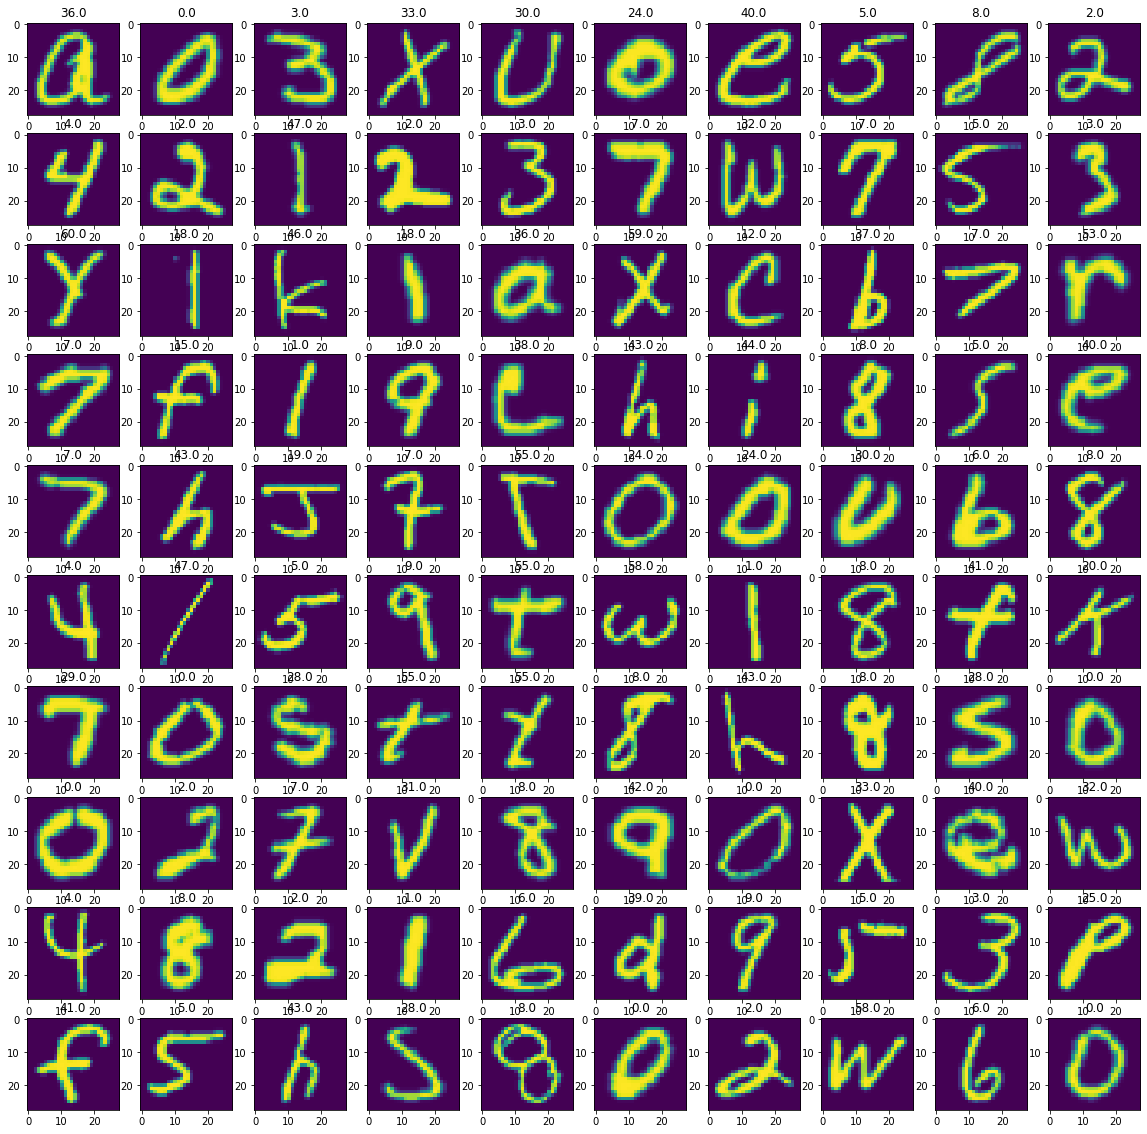

In [8]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10,10, figsize=(20,20))
for i,ax in enumerate(axes.flat):
    ax.imshow(imagen[i])
    ax.set_title(y[i])


In [9]:
from sklearn.model_selection import train_test_split


* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [10]:
y_upper=np.where((y>=10) & (y<= 35),1,0)
X_train,X_test,y_train,y_test=train_test_split(X,y_upper,test_size=0.2)

In [11]:
# Your code here
# from sklearn.neighbors import KNeighborsClassifier
# knn=KNeighborsClassifier(n_neighbors=3)
# fit=knn.fit(X_train,y_train)
# predicciones=fit.predict(X_test)
# predict_train=fit.predict(X_train)

In [12]:
# from sklearn.metrics import accuracy_score
# print(f'3NN accuracy:{accuracy_score(y_test,predicciones)}')

In [13]:
modelos=[]
modelos.append(('LDA',LinearDiscriminantAnalysis()))
#modelos.append(('KNN',KNeighborsClassifier()))
modelos.append(('CART',DecisionTreeClassifier()))
modelos.append(('NB',GaussianNB()))
#modelos.append(('SVM',SVC()))

In [14]:
scoring='accuracy'
resultados=[]
nombres=[]
for nombre,modelo in modelos:
    kfold=model_selection.KFold(n_splits=4,random_state=1)
    cv_resultados=model_selection.cross_val_score(modelo,X_train,y_train,cv=kfold,scoring=scoring)
    resultados.append(cv_resultados)
    nombres.append(nombre)
    print(f'{nombre},{cv_resultados.mean()},({cv_resultados.std()})')

D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA,0.7472516612686613,(0.0015419389522196166)
CART,0.7594699921269235,(0.0021379533998186285)
NB,0.7410619130666908,(0.0019642464126211285)


* Try to do the same thing with lowercases.

In [15]:
# Your code here
y_lower=np.where(y>35,1,0)
X_train,X_test,y_train,y_test=train_test_split(X,y_lower,test_size=0.2)
# knn=KNeighborsClassifier(n_neighbors=3)
# fit=knn.fit(X_train,y_train)
# predicciones=fit.predict(X_test)

In [16]:
modelos=[]
modelos.append(('LDA',LinearDiscriminantAnalysis()))
#modelos.append(('KNN',KNeighborsClassifier()))
modelos.append(('CART',DecisionTreeClassifier()))
modelos.append(('NB',GaussianNB()))
#modelos.append(('SVM',SVC()))
scoring='accuracy'
resultados=[]
nombres=[]
for nombre,modelo in modelos:
    kfold=model_selection.KFold(n_splits=4,random_state=1)
    cv_resultados=model_selection.cross_val_score(modelo,X_train,y_train,cv=kfold,scoring=scoring)
    resultados.append(cv_resultados)
    nombres.append(nombre)
    print(f'{nombre},{cv_resultados.mean()},({cv_resultados.std()})')

D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA,0.8085152351753657,(0.0013367765571837564)
CART,0.787474361968924,(0.0018165562091621078)
NB,0.27044712726196674,(0.009178337710093906)


* Try to do the same thing with numbers.

In [17]:
# Your code here
y_num=np.where(y<10,1,0)
X_train,X_test,y_train,y_test=train_test_split(X,y_num,test_size=0.2)
# knn=KNeighborsClassifier(n_neighbors=3)
# fit=knn.fit(X_train,y_train)
# predicciones=fit.predict(X_test)

In [18]:
modelos=[]
modelos.append(('LDA',LinearDiscriminantAnalysis()))
#modelos.append(('KNN',KNeighborsClassifier()))
modelos.append(('CART',DecisionTreeClassifier()))
modelos.append(('NB',GaussianNB()))
#modelos.append(('SVM',SVC()))
scoring='accuracy'
resultados=[]
nombres=[]
for nombre,modelo in modelos:
    kfold=model_selection.KFold(n_splits=4,random_state=1)
    cv_resultados=model_selection.cross_val_score(modelo,X_train,y_train,cv=kfold,scoring=scoring)
    resultados.append(cv_resultados)
    nombres.append(nombre)
    print(f'{nombre},{cv_resultados.mean()},({cv_resultados.std()})')

D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA,0.7333140284802427,(0.002901564727593351)
CART,0.7732142498176768,(0.0021481959578914553)
NB,0.546514443045427,(0.003915514940040176)


No pude correr KNN ni SVC ya que la compu se tardaba mucho procesando las imagenes